In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/PUI2015_fbianco/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/Users/tianyigu/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df_W=pd.read_csv('201501-citibike-tripdata.csv')
print df_W.columns
df_S=pd.read_csv('201506-citibike-tripdata.csv')

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [9]:
winage = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
sumage = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]
allage = pd.concat([winage,sumage], axis=0)

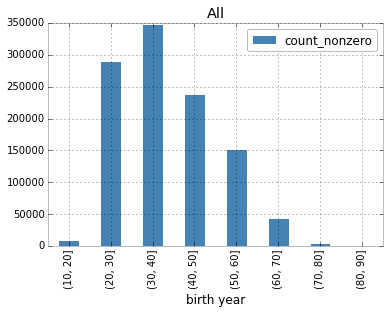

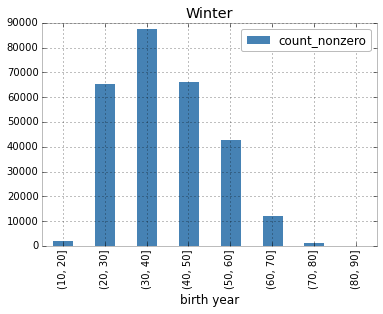

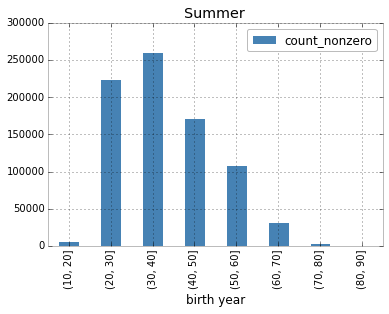

In [12]:
bins = np.arange(10, 99, 10)

allage.groupby(pd.cut(allage, bins)).agg([count_nonzero]).plot(kind='bar', title="All")
A_age_dist = allage.groupby(pd.cut(allage, bins)).agg([count_nonzero])
winage.groupby(pd.cut(winage, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = winage.groupby(pd.cut(winage, bins)).agg([count_nonzero])
sumage.groupby(pd.cut(sumage, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = sumage.groupby(pd.cut(sumage, bins)).agg([count_nonzero])

# KS-Test

In [20]:
ksA=scipy.stats.kstest(A_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
ksW=scipy.stats.kstest(W_age_dist, 'norm')
print "All riders, normal fit", ksA
print "winter, normal fit", ksW
print "summer, normal fit", ksS

ksA=scipy.stats.kstest(A_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
print "All riders, cauchy fit", ksA
print "winter, normal fit", ksW
print "summer, normal fit", ksS

ksA=scipy.stats.kstest(A_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
print "All riders, gamma fit", ksA
print "winter, normal fit", ksW
print "summer, normal fit", ksS

All riders, normal fit KstestResult(statistic=1.0, pvalue=0.0)
winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)
All riders, cauchy fit KstestResult(statistic=0.99999908652913039, pvalue=0.0)
winter, normal fit KstestResult(statistic=0.99999637418970078, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.9999987788873137, pvalue=0.0)
All riders, gamma fit KstestResult(statistic=1.0, pvalue=0.0)
winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)


,count_nonzero
birth year,
"(10, 20]",2474
"(20, 30]",65630
"(30, 40]",87790
"(40, 50]",66419
"(50, 60]",43316
"(60, 70]",12548
"(70, 80]",1551
"(80, 90]",58


# AD Test

In [19]:
adA=scipy.stats.anderson(A_age_dist['count_nonzero'], 'norm')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], 'norm')
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], 'norm')
print "All riders, normal fit", adA
print "winter, normal fit", adW
print "summer, normal fit", adS

adA=scipy.stats.anderson(A_age_dist['count_nonzero'], 'expon')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], 'expon')
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], 'expon')
print "All riders, expon fit", adA
print "winter, normal fit", adW
print "summer, normal fit", adS

adA=scipy.stats.anderson(A_age_dist['count_nonzero'], 'logistic')
adS=scipy.stats.anderson(S_age_dist['count_nonzero'], 'logistic')
adW=scipy.stats.anderson(W_age_dist['count_nonzero'], 'logistic')
print "All riders, logistic fit", adA
print "winter, normal fit", adW
print "summer, normal fit", adS

All riders, normal fit AndersonResult(statistic=0.48879337107880438, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
winter, normal fit AndersonResult(statistic=0.51784746818828786, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=0.49445082104942983, critical_values=array([ 0.519,  0.591,  0.709,  0.827,  0.984]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
All riders, expon fit AndersonResult(statistic=1.6403068040605575, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
winter, normal fit AndersonResult(statistic=1.5981565415121732, critical_values=array([ 0.858,  1.003,  1.247,  1.494,  1.82 ]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonRes

There is no significant difference between normal cauchy and gamma in KS test.
In AD Test, exponential distribution is better than the others.